### **Temel İstatistik Kavramları**

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
populasyon = np.random.randint(0, 80, 10000)
populasyon.mean()

39.0413

In [ ]:
np.random.seed(115)

orneklem = np.random.choice(a=populasyon, size=100)
orneklem.mean()

#10000 kişi içinden 100 temsili kişi/örneklem çektik.

38.08

In [ ]:
np.random.seed(10)
orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
 + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10


39.105999999999995

### **Descriptive Statistics (Betimsel İstatistikler)**

In [ ]:
df = sns.load_dataset("tips")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


### **Confidence Intervals (Güven Aralıkları)**

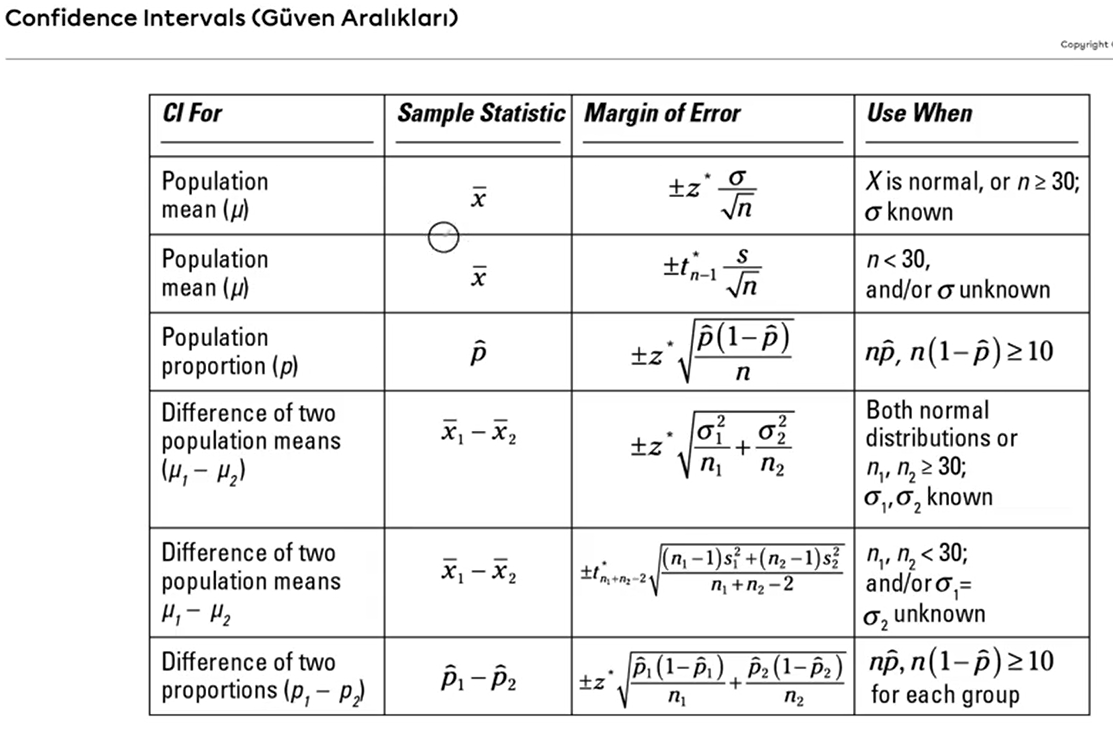

In [ ]:
# Tips Veri Setindeki Sayısal Değişkenler için Güven Aralığı Hesabı
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.00000,19.78594,8.90241,3.07000,13.34750,17.79500,24.12750,50.81000
tip,244.00000,2.99828,1.38364,1.00000,2.00000,2.90000,3.56250,10.00000
size,244.00000,2.56967,0.95110,1.00000,2.00000,2.00000,3.00000,6.00000


In [ ]:
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

# kötü ya da iyi senaryoda ne kazanırım. Ortalaması 19 du. %95 güven ile aşağıdaki aralıktadır. %5'te hata/yanılma payımız var. 

(18.66333170435847, 20.908553541543164)

In [ ]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

# Bahşiş ortalaması 2.99828 du. %95 güven ile aşağıdaki aralıktadır. %5'te hata/yanılma payımız var. 

(2.823799306281821, 3.1727580707673595)

#### **Titanic**

In [ ]:
# Titanic Veri Setindeki Sayısal Değişkenler için Güven Aralığı Hesabı
df = sns.load_dataset("titanic")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.00000,0.38384,0.48659,0.00000,0.00000,0.00000,1.00000,1.00000
pclass,891.00000,2.30864,0.83607,1.00000,2.00000,3.00000,3.00000,3.00000
age,714.00000,29.69912,14.52650,0.42000,20.12500,28.00000,38.00000,80.00000
sibsp,891.00000,0.52301,1.10274,0.00000,0.00000,0.00000,1.00000,8.00000
parch,891.00000,0.38159,0.80606,0.00000,0.00000,0.00000,0.00000,6.00000
fare,891.00000,32.20421,49.69343,0.00000,7.91040,14.45420,31.00000,512.32920


In [ ]:
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()

(28.631790041821507, 30.766445252296133)

In [ ]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.936831234567325, 35.471584702581936)

### **Correlation (Korelasyon)**

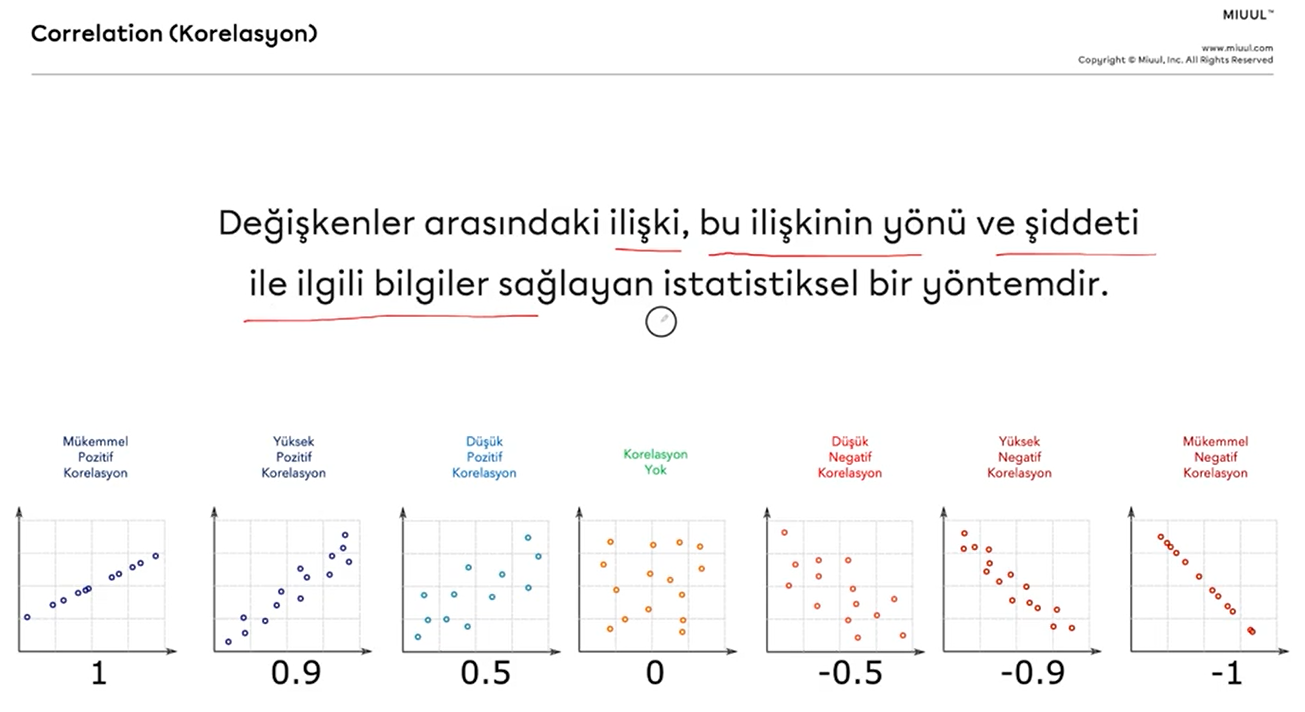

#### **Bahşiş veri seti :**

* **total_bill :** yemeğin toplam fiyatı (bahşiş ve vergi dahil)

* **tip :** bahşiş

* **sex :** ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

* **smoker :** grupta sigara içen var mı? (0=No, 1=Yes)

* **day :** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

* **time :** ne zaman? (0=Day, 1=Night)

* **size :** grupta kaç kişi var?

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99000,1.01000,Female,No,Sun,Dinner,2
1,10.34000,1.66000,Male,No,Sun,Dinner,3
2,21.01000,3.50000,Male,No,Sun,Dinner,3
3,23.68000,3.31000,Male,No,Sun,Dinner,2
4,24.59000,3.61000,Female,No,Sun,Dinner,4


In [ ]:
df["total_bill"] = df["total_bill"] - df["tip"] #total_bill içindeki bahşişleri çıkarıyoruz.

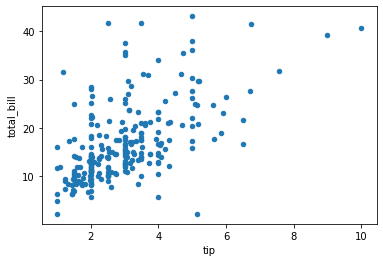

In [ ]:
df.plot.scatter("tip", "total_bill")
plt.show()

# Aşağıdaki grafikten görüleceği üzere pozitif bir ilişki söz konusudur. Şiddeti ile ilgili bir 
#yorum yapamasamda bir ilişki var gibi.

In [ ]:
df["tip"].corr(df["total_bill"])

# pozitif yönlü orta şiddette bir ilişki vardır. Ödenen hesap arttıkça bahşişte artacaktır.

0.5766634471096374

#### **AB Testing (Bağımsız İki Örneklem T Testi)**

 1. Hipotezleri Kur
 2. Varsayım Kontrolü
   - 1. Normallik Varsayımı
   - 2. Varyans Homojenliği
 3. Hipotezin Uygulanması
   - a. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
   - b. Varsayımlar sağlanmıyorsa Mann–Whitney U testi (non-parametrik test)
 4. p-value değerine göre sonuçları yorumla

**Not:**
 - Normallik sağlanmıyorsa direk a. arguman, Varyans homojenliği sağlanmıyorsa b. arguman girilir.
 - Normallik incelemesi öncesi aykırı değer incelemesi ve düzeltmesi yapmak faydalı olabilir.



#### **Uygulama 1:** Sigara İçenler ile İçmeyenlerin Hesap Ortalamaları Arasında istatistiki olarak anlamlı bir (ist ol an) Fark var mı?

In [ ]:
df = sns.load_dataset("tips")

df.groupby("smoker").agg({"total_bill": "mean"})

# Matematiksel olarak fark var gibi gözüküyor. Acaba gerçekten anlamlı bir fark var mı ? Yoksa fark şans eseri mi ortaya çıktı ? 

,total_bill
smoker,
Yes,20.75634
No,19.18828


In [ ]:
# 1. Hipotezi Kur

# H0: M1 = M2 Bu problem için : Müşterilerin sigara içip içmeme durumuyla hesap ortalamaları arasında anlamlı bir fark "YOKTUR" der. 
# H1: M1 != M2  (... vardır)

# 2. Varsayım Kontrolü

# Normallik Varsayımı : Bir değişkenin dağılımın standart normal dağılıma benzer olup olmadığının hipotez testidir.

# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır.


test_stat, pvalue = shapiro(df.loc[df["smoker"] == "Yes", "total_bill"]) # bu kod, dağılımın normal olup olmadığını test eder.
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# p-value < ise 0.05'ten H0 REDDEDİLİR.
# p-value < değilse 0.05 H0 REDDEDİLEMEZ.

Test Stat = 0.9367, p-value = 0.0002


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["smoker"] == "No", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9045, p-value = 0.0000


In [ ]:
# Varyans Homojenliği

# H0: Varyanslar Homojendir. H0 ın red edilmemesini istiyoruz ki varsayımlar sağlansın.
# H1: Varyanslar Homojen değildir.

test_stat, pvalue = levene(df.loc[df["smoker"] == "Yes", "total_bill"],
                           df.loc[df["smoker"] == "No", "total_bill"])

# levene bana iki grup gönder varyans homojenliğini test edeyim der.

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# p-value <  0.05  ise H0 REDDELİR.
# p-value >  0.05  ise H0 REDDEDİLEMEZ.

Test Stat = 4.0537, p-value = 0.0452


 **p-value < ise 0.05 'ten HO RED edilir. Burada küçük olduğu için H0 red edilir, homojen değildir.**

In [ ]:
# 3 ve 4. Hipotezin Uygulanması


# a. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)
# b. Varsayımlar sağlanmıyorsa Mann–Whitney U testi (non-parametrik test)


# a. Varsayımlar sağlanıyorsa bağımsız iki örneklem t testi (parametrik test)

test_stat, pvalue = ttest_ind(df.loc[df["smoker"] == "Yes", "total_bill"],
                              df.loc[df["smoker"] == "No", "total_bill"],
                              equal_var=True) #equal_var=False yaparsan başka test uygular arka tarafta

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

# p-value < ise 0.05 'ten H0 REDDEDİLİR.
# p-value < değilse 0.05 H0  REDDEDİLEMEZ.

Test Stat = 1.3384, p-value = 0.1820


**Varsayım sağlanıyormuş gibi düşünelim bu soru için sağlanmadı fakat sağlansaydı nasıl olurdu onu da görelim. p value değeri 0.05 ten küçük olduğu için H0 Reddedilir. Buradan şu sonuç ortaya çıkardı,  Müşterilerin sigara içip içmeme durumuyla hesap ortalamaları arasında istatistiksel olarak anlamlı bir fark vardır diyebilirdik. Fakat bu aslında sağlanmadı.** 

In [ ]:
# b. Varsayımlar sağlanmıyorsa Mann–Whitney U testi (non-parametrik test)

test_stat, pvalue = mannwhitneyu(df.loc[df["smoker"] == "Yes", "total_bill"],
                                 df.loc[df["smoker"] == "No", "total_bill"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 7531.5000, p-value = 0.3413


**Mann–Whitney U nonparametrik ortalama ve medyan kıyaslama testidir. p > 0.05 olduğu için H0 REDDEDİLEMEDİ. Müşterilerin sigara içip içmeme durumuyla hesap ortalamaları arasında istatistiksel olarak anlamlı bir farklılık yoktur.**

#### **Uygulama 2:** Titanic Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anl. Fark. var mıdır?

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.groupby("sex").agg({"age": "mean"})

# Yaş ortalamaları arasında bir fark var acaba bu şans eseri mi ortaya çıktı ? Hipotez testimizi kuralım.

,age
sex,
female,27.91571
male,30.72664


In [ ]:
# 1. Hipotezleri kur:

# H0: M1  = M2 (Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anl. Fark. Yoktur)
# H1: M1! = M2 (... vardır)


# 2. Varsayımları İncele

# Normallik varsayımı
# H0: Normal dağılım varsayımı sağlanmaktadır.
# H1:..sağlanmamaktadır


test_stat, pvalue = shapiro(df.loc[df["sex"] == "female", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9848, p-value = 0.0071


In [ ]:
test_stat, pvalue = shapiro(df.loc[df["sex"] == "male", "age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9747, p-value = 0.0000


In [ ]:
# Varyans homojenliği
# H0: Varyanslar Homojendir
# H1: Varyanslar Homojen Değildir

test_stat, pvalue = levene(df.loc[df["sex"] == "female", "age"].dropna(),
                           df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 0.0013, p-value = 0.9712


In [ ]:
# Varsayımlar sağlanmadığı için nonparametrik

test_stat, pvalue = mannwhitneyu(df.loc[df["sex"] == "female", "age"].dropna(),
                                 df.loc[df["sex"] == "male", "age"].dropna())

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 53212.5000, p-value = 0.0261


**H0 reddedilir yani Kadın ve Erkek Yolcuların Yaş Ortalamaları Arasında İstatistiksel Olarak Anl. Fark. VARDIR.**

#### **Uygulama 3:** Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark var mıdır?

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSMLBC10/week_6 (03.11.22-09.11.22)/ab_testing/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


In [ ]:
df.groupby("Outcome").agg({"Age": "mean"})

,Age
Outcome,
0,31.19000
1,37.06716


In [ ]:
# 1. Hipotezleri kur
# H0: M1 = M2 Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark Yoktur
# H1: M1 != M2 (... vardır)

# 2. Varsayımları İncele

# Normallik Varsayımı (H0: Normal dağılım varsayımı sağlanmaktadır.)
test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 1, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df.loc[df["Outcome"] == 0, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))



Test Stat = 0.9546, p-value = 0.0000
Test Stat = 0.8012, p-value = 0.0000


In [ ]:
# Normallik varsayımı sağlanmadığı için nonparametrik. 
#(Medyan ve sıralama kıyasıyla ilgili olabilir. Dikkat et.)

# Hipotez (H0: M1 = M2)
test_stat, pvalue = mannwhitneyu(df.loc[df["Outcome"] == 1, "Age"].dropna(),
                                 df.loc[df["Outcome"] == 0, "Age"].dropna())
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 92050.0000, p-value = 0.0000


**Sonuç : Şansa yer bırakmayacak şekilde Diyabet Hastası Olan ve Olmayanların Yaşları Ort. Arasında İst. Ol. Anl. Fark VARDIR. Yaşı daha yüksek olanlar diyabet hastalığına yakın gibi gözüküyor.**

#### **İş Problemi:** Kursun Büyük Çoğunluğunu İzleyenler ile İzlemeyenlerin Puanları Birbirinden Farklı mı?

In [ ]:
# H0: M1 = M2 (... iki grup ortalamaları arasında ist ol.anl.fark yoktur.)
# H1: M1 != M2 (...vardır)

df = pd.read_csv("/content/drive/MyDrive/DSMLBC10/week_5 (27.10.22-02.11.22)/datasets/course_reviews.csv")
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.00000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.00000,0.00000,0.00000
1,5.00000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.00000,0.00000,0.00000
2,4.50000,2021-02-04 20:34:03,2019-07-04 23:23:27,1.00000,0.00000,0.00000
3,5.00000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.00000,0.00000,0.00000
4,4.00000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.00000,0.00000,0.00000


In [ ]:
df[(df["Progress"] > 75)]["Rating"].mean()

4.860491071428571

In [ ]:
df[(df["Progress"] < 25)]["Rating"].mean()

4.7225029148853475

In [ ]:
test_stat, pvalue = shapiro(df[(df["Progress"] > 75)]["Rating"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


test_stat, pvalue = shapiro(df[(df["Progress"] < 25)]["Rating"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3160, p-value = 0.0000
Test Stat = 0.5710, p-value = 0.0000


In [ ]:
test_stat, pvalue = mannwhitneyu(df[(df["Progress"] > 75)]["Rating"],
                                 df[(df["Progress"] < 25)]["Rating"])


In [ ]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 661481.5000, p-value = 0.0000


#### **AB Testing (İki Örneklem Oran Testi)**

İki **oran** arasında karşılaştırma yapmak için kullanılır. Önceden elimde ortalamalar vardı şimdi ise oranlar var.

In [ ]:
# H0: p1 = p2
# Yeni Tasarımın Dönüşüm Oranı ile Eski Tasarımın Dönüşüm Oranı Arasında İst. Ol. Anlamlı Farklılık Yoktur.
# H1: p1 != p2
# ... vardır

basari_sayisi = np.array([300, 250])
gozlem_sayilari = np.array([1000, 1100])

proportions_ztest(count=basari_sayisi, nobs=gozlem_sayilari)


basari_sayisi / gozlem_sayilari

array([0.3       , 0.22727273])

#### **Uygulama 4:** Kadın ve Erkeklerin Hayatta Kalma **Oranları** Arasında İst. Olarak An. Farklılık var mıdır?

In [ ]:
# H0: p1 = p2
# Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark yoktur

# H1: p1 != p2 (... vardır)

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.loc[df["sex"] == "female", "survived"].mean()

0.7420382165605095

In [ ]:
df.loc[df["sex"] == "male", "survived"].mean()

0.18890814558058924

In [ ]:
female_succ_count = df.loc[df["sex"] == "female", "survived"].sum()
male_succ_count = df.loc[df["sex"] == "male", "survived"].sum()

In [ ]:
df.groupby("sex").agg({"survived":["mean","sum"]})

survived     
           mean  sum
sex                 
female  0.74204  233
male    0.18891  109

In [ ]:
test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                      nobs=[df.loc[df["sex"] == "female", "survived"].shape[0],
                                            df.loc[df["sex"] == "male", "survived"].shape[0]])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 16.2188, p-value = 0.0000


**Kadın ve Erkeklerin Hayatta Kalma Oranları Arasında İst. Olarak An. Fark VARDIR. ELDE ETTİK.**

### **ANOVA (Analysis of Variance)**

In [ ]:
# İkiden fazla grup ortalamasını karşılaştırmak için kullanılır.

df = sns.load_dataset("tips")
df.head()

df.groupby("day")["total_bill"].mean()

# 1. Hipotezleri kur

# HO: m1 = m2 = m3 = m4
# Grup ortalamaları arasında fark yoktur.

# H1: .. fark vardır

day
Thur   17.68274
Fri    17.15158
Sat    20.44138
Sun    21.41000
Name: total_bill, dtype: float64

In [ ]:
# 2. Varsayım kontrolü

# Normallik varsayımı
# Varyans homojenliği varsayımı

# Varsayım sağlanıyorsa one way anova
# Varsayım sağlanmıyorsa nonparametrik, ikiden fazla grup ortalama testi olan kruskal kullanılır.

# H0: Normal dağılım varsayımı sağlanmaktadır.

for group in list(df["day"].unique()):
    pvalue = shapiro(df.loc[df["day"] == group, "total_bill"])[1]
    print(group, 'p-value: %.4f' % pvalue)

Sun p-value: 0.0036
Sat p-value: 0.0000
Thur p-value: 0.0000
Fri p-value: 0.0409


**Hepsinin p value değeri 0.05 te küçük olduğu için H0 hipotezi reddedilir. Hiç birisi için normallik varsayımı sağlanmamaktadır. Bu sağlanmadığı için doğrudan nonparametrik yönteme gidilir.** 

In [ ]:
# H0: Varyans homojenliği varsayımı sağlanmaktadır.

test_stat, pvalue = levene(df.loc[df["day"] == "Sun", "total_bill"],
                           df.loc[df["day"] == "Sat", "total_bill"],
                           df.loc[df["day"] == "Thur", "total_bill"],
                           df.loc[df["day"] == "Fri", "total_bill"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.6654, p-value = 0.5741


**p value değeri 0.05 te büyük olduğu için H0 hipotezi reddedilemez. Varyans homojenliği varsayımı sağlanmaktadır.** 

In [ ]:
# 3. Hipotez testi ve p-value yorumu

# Hiç biri sağlamıyor.
df.groupby("day").agg({"total_bill": ["mean", "median"]})


# HO: Grup ortalamaları arasında ist ol anl fark yoktur.

total_bill         
           mean   median
day                     
Thur   17.68274 16.20000
Fri    17.15158 15.38000
Sat    20.44138 18.24000
Sun    21.41000 19.63000

In [ ]:
# parametrik anova testi:
f_oneway(df.loc[df["day"] == "Thur", "total_bill"],
         df.loc[df["day"] == "Fri", "total_bill"],
         df.loc[df["day"] == "Sat", "total_bill"],
         df.loc[df["day"] == "Sun", "total_bill"])


F_onewayResult(statistic=2.7674794432863363, pvalue=0.04245383328952047)

**p value değeri 0.05 te küçük olduğu için H0 hipotezi reddedilir. Grup ortalamaları arasında ist ol anl fark vardır.** 

In [ ]:
# Nonparametrik anova testi:
kruskal(df.loc[df["day"] == "Thur", "total_bill"],
        df.loc[df["day"] == "Fri", "total_bill"],
        df.loc[df["day"] == "Sat", "total_bill"],
        df.loc[df["day"] == "Sun", "total_bill"])

KruskalResult(statistic=10.403076391437086, pvalue=0.01543300820104127)

**p value değeri 0.05 te küçük olduğu için H0 hipotezi reddedilir. Grup ortalamaları arasında ist ol anl fark vardır.** 

**Grup ortalamaları arasında ist ol anl fark vardır. Peki farklılık hangi gruptan kaynaklanıyor. Bunu gösterelim.**

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df['total_bill'], df['day'])
tukey = comparison.tukeyhsd(0.05)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4554 -2.4802  9.0598  False
   Fri    Sun   4.2584 0.2373 -1.5859 10.1028  False
   Fri   Thur   0.5312    0.9 -5.4437   6.506  False
   Sat    Sun   0.9686 0.8921 -2.6089  4.5462  False
   Sat   Thur  -2.7586 0.2375 -6.5456  1.0284  False
   Sun   Thur  -3.7273 0.0669 -7.6266  0.1721  False
----------------------------------------------------


**Hiç birisi arasında istatistiki olarak anlamlı bir farklılık yok. İkili karşılaştırma yapıldığında kayda değer bir farklılık bulunamadı. Ama gruba komple baktığımda bir farklılık vardı ne yapmalıyım ? Alfa değeri değiştirilebilir. 0.10 yaparak tekrar deneyelim.** 

In [ ]:
from statsmodels.stats.multicomp import MultiComparison
comparison = MultiComparison(df['total_bill'], df['day'])
tukey = comparison.tukeyhsd(0.10)
print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.10 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   Fri    Sat   3.2898 0.4554 -1.8479  8.4275  False
   Fri    Sun   4.2584 0.2373 -0.9455  9.4624  False
   Fri   Thur   0.5312    0.9  -4.789  5.8513  False
   Sat    Sun   0.9686 0.8921 -2.2169  4.1542  False
   Sat   Thur  -2.7586 0.2375 -6.1307  0.6134  False
   Sun   Thur  -3.7273 0.0669 -7.1994 -0.2552   True
----------------------------------------------------


**p ve z dağılımın karar noktaları uç noktalardır buralara göre değerlendirme yapıldığında yaygınca kullanılan uç nokta 0.05 tir. Fakat bunu değiştirebilirsin. Yukarıdaki tablodan da görüyoruz ki "SUN VE THUR" arasındaki farklılıktan kaynaklandığını yakaladık.**

Alfayı 0.10 yapmasaydık bile SUN ve THUR  0.0669 olan p-adj değeri diğerlerine kıyasla en küçük değerdir ve ayrıca iş bilgisi gereğide Perşembe ve Pazar arası fark olması beklenir. 